# Set-Up Data

files='''326.jpg,365.jpg
350.jpg
333.jpg
347.jpg
348.jpg
335.jpg
321.jpg
344.jpg
343.jpg
361.jpg
331.jpg
370.jpg
367.jpg
371.jpg
353.jpg
329.jpg
345.jpg
372.jpg
313.jpg
325.jpg
322.jpg
314.jpg
356.jpg
336.jpg
342.jpg
334.jpg
357.jpg
315.jpg
359.jpg
319.jpg
364.jpg
320.jpg
369.jpg
328.jpg
352.jpg
339.jpg
327.jpg
362.jpg
337.jpg
355.jpg
338.jpg
341.jpg
368.jpg
351.jpg'''

In [75]:
files_arr=files.split('\n')

In [1]:
#files_arr[-1]

In [2]:
#files_arr.pop(-1)

In [78]:
len(files_arr)

45

In [10]:
import os

In [11]:
os.getcwd()

'D:\\Rahul Golani\\Web Application to Consume Deep Learning Model'

In [22]:
os.chdir('D:\\Rahul Golani\\Web Application to Consume Deep Learning Model\\dataset\\train')

In [23]:
os.getcwd()

'D:\\Rahul Golani\\Web Application to Consume Deep Learning Model\\dataset\\train'

In [24]:
import shutil

In [79]:
for f in files_arr:
    shutil.move(f, 'D:\\Rahul Golani\\Web Application to Consume Deep Learning Model\\Dance Forms\\train\\sattriya')

In [3]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [5]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
# import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import os

In [10]:
os.getcwd()

'D:\\Rahul Golani\\Web Application to Consume Deep Learning Model'

In [12]:
train_path='Dance Forms/train'
test_path='Dance Forms/test'
valid_path='Dance Forms/valid'

In [66]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(280,280), classes=['bharatanatyam','kathak','kathakali','kuchipudi','manipuri','mohiniyattam','odissi','sattriya'], batch_size=10)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(280,280), batch_size=4)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(280,280), classes=['bharatanatyam','kathak','kathakali','kuchipudi','manipuri','mohiniyattam','odissi','sattriya'])

Found 328 images belonging to 8 classes.
Found 156 images belonging to 1 classes.
Found 36 images belonging to 8 classes.


<pre>
ImageDataGenerator is a keras object which genaerates batches of tensor image data and this is the actual format in which the omage needs to be on to be read by keras.

flow_from_directory needs to be given a path, that contains a folder, that contains images
</pre>

In [82]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [85]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

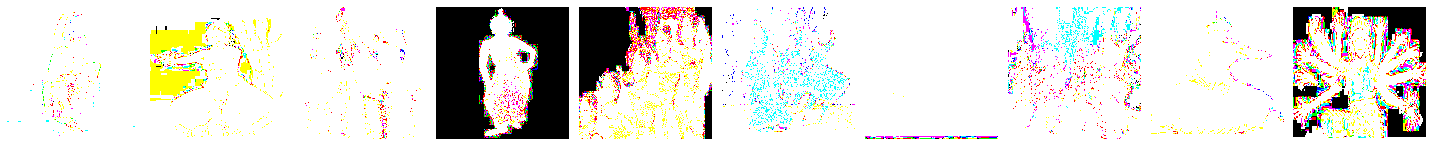

In [86]:
plotImages(imgs)

In [88]:
print(labels)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]
